# DESCRIPTIVE STATISTICS

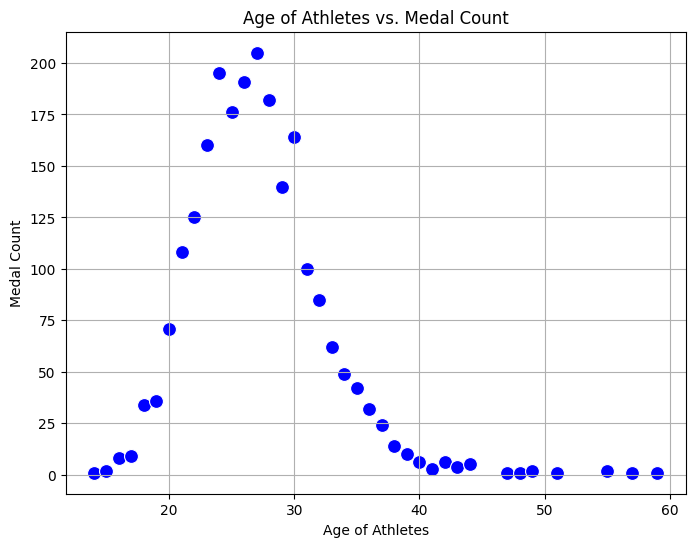

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


athletes = pd.read_csv('paris_olympics2024/paris olympics 2024 dataset updated/athletes.csv')
medallists = pd.read_csv('paris_olympics2024/paris olympics 2024 dataset updated/medallists.csv')


athletes['birth_date'] = pd.to_datetime(athletes['birth_date'])
current_year = datetime.now().year
athletes['age'] = current_year - athletes['birth_date'].dt.year

merged_data = pd.merge(medallists, athletes, on='name')


age_medal_count = merged_data.groupby('age')['medal_type'].count().reset_index()
age_medal_count.columns = ['age', 'medal_count']


plt.figure(figsize=(8, 6))
sns.scatterplot(data=age_medal_count, x='age', y='medal_count', s=100, color='b')

plt.title('Age of Athletes vs. Medal Count')
plt.xlabel('Age of Athletes')
plt.ylabel('Medal Count')
plt.grid(True)
plt.show()


In [7]:
import pandas as pd
import numpy as np
from scipy.stats import mode

# Load datasets
medallists = pd.read_csv('paris_olympics2024/paris olympics 2024 dataset updated/medallists.csv')
events = pd.read_csv('paris_olympics2024/paris olympics 2024 dataset updated/events.csv')

# Merge datasets on 'event'
merged_data = pd.merge(medallists, events, on='event', how='left')

# Map medal values to create a numerical representation of medals
medal_values = {
    'Gold Medal': 3,
    'Silver Medal': 2,
    'Bronze Medal': 1,
    'No Medal': 0
}
merged_data['medal_value'] = merged_data['medal_type'].map(medal_values)

# Drop missing values in 'medal_value' column
numerical_data = merged_data['medal_value'].dropna()

# Calculating basic statistics
mean_value = np.mean(numerical_data)
median_value = np.median(numerical_data)

# Handle the mode calculation with a try-except to avoid scalar issues
try:
    mode_value = mode(numerical_data).mode[0]
except IndexError:
    mode_value = numerical_data.mode().iloc[0]  # Fallback to pandas mode calculation

std_dev = np.std(numerical_data)
variance = np.var(numerical_data)
min_value = np.min(numerical_data)
max_value = np.max(numerical_data)
range_value = max_value - min_value
percentiles = np.percentile(numerical_data, [25, 50, 75])

# Print the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Min: {min_value}")
print(f"Max: {max_value}")
print(f"Range: {range_value}")
print(f"25th, 50th, and 75th Percentiles: {percentiles}")


Mean: 2.001686507936508
Median: 2.0
Mode: 2
Standard Deviation: 0.813268643099997
Variance: 0.6614058858497104
Min: 1
Max: 3
Range: 2
25th, 50th, and 75th Percentiles: [1. 2. 3.]


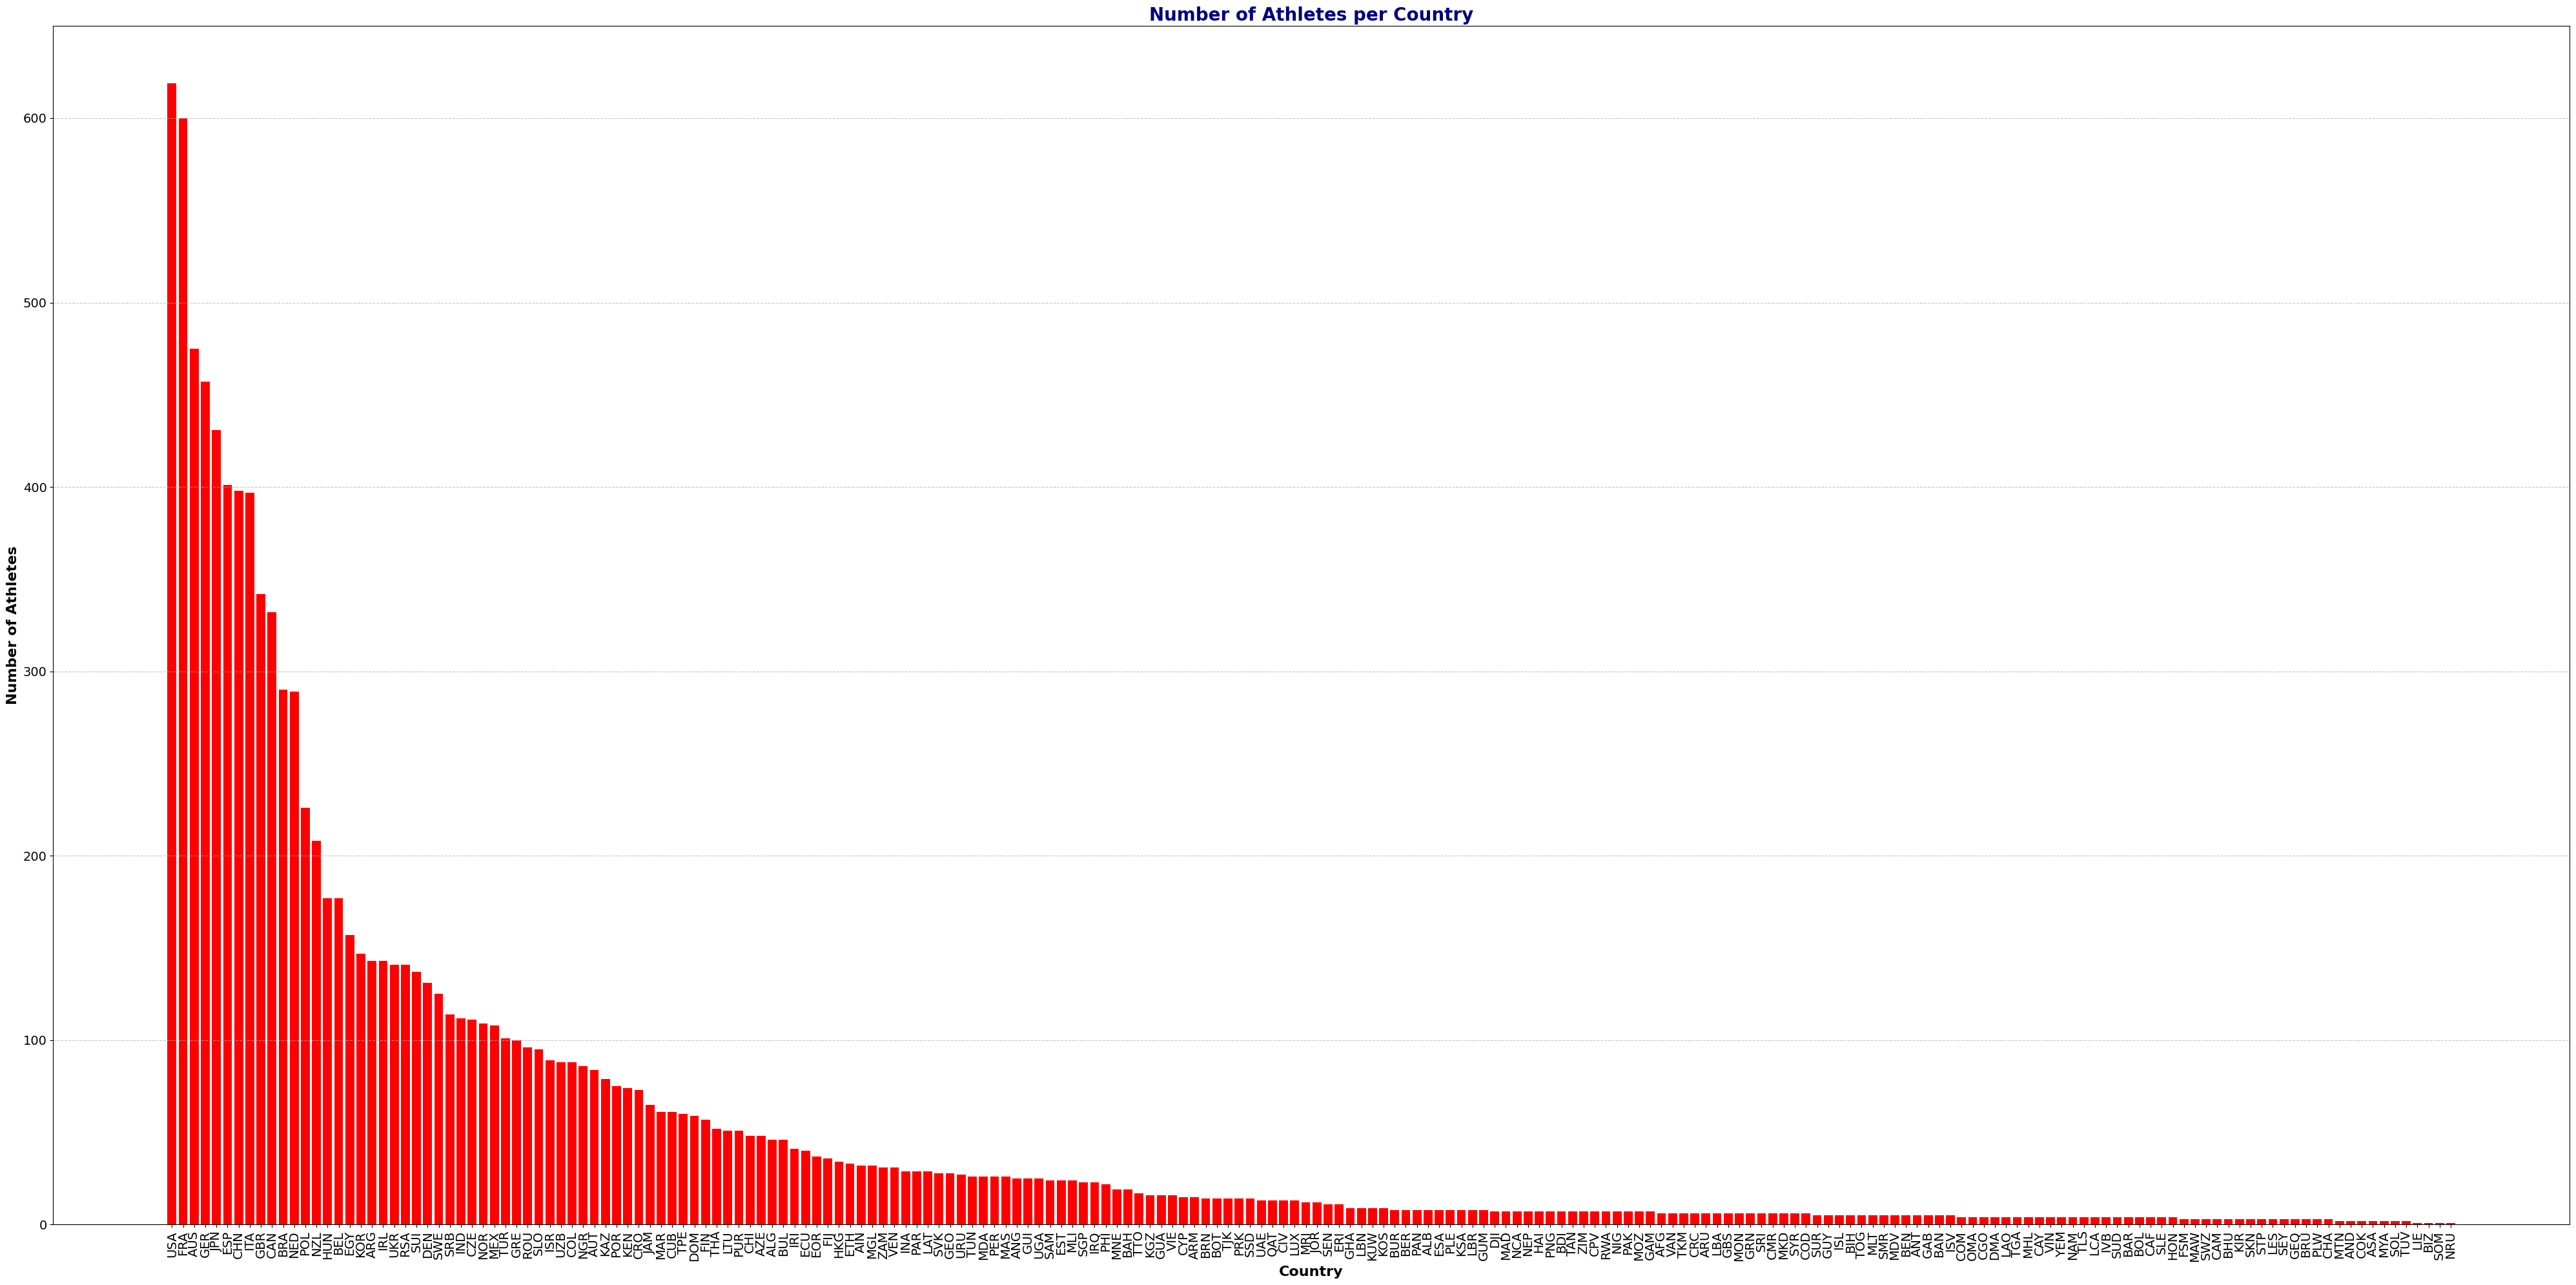

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

athletes_df = pd.read_csv('paris_olympics2024/paris olympics 2024 dataset updated/athletes.csv')


country_counts = athletes_df['country_code'].value_counts()


plt.figure(figsize=(40, 20))  


solid_red_color = 'red'


bars = plt.bar(country_counts.index, country_counts.values, color=solid_red_color, width=0.8)


plt.xticks(rotation=90)

plt.title("Number of Athletes per Country", fontsize=20, fontweight='bold', color='navy')
plt.xlabel("Country", fontsize=16, fontweight='bold')
plt.ylabel("Number of Athletes", fontsize=16, fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=14)


plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout() 
plt.show()


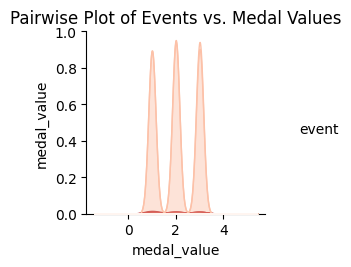

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

medallists = pd.read_csv('paris_olympics2024/paris olympics 2024 dataset updated/medallists.csv')
events = pd.read_csv('paris_olympics2024/paris olympics 2024 dataset updated/events.csv')


merged_data = pd.merge(medallists, events, on='event', how='left')


medal_values = {
    'Gold Medal': 3,
    'Silver Medal': 2,
    'Bronze Medal': 1,
    'No Medal': 0
}

merged_data['medal_value'] = merged_data['medal_type'].map(medal_values)


pairwise_data = merged_data[['event', 'medal_value']]  


sns.pairplot(pairwise_data, hue='event', palette='Reds') 
plt.title('Pairwise Plot of Events vs. Medal Values')
plt.show()


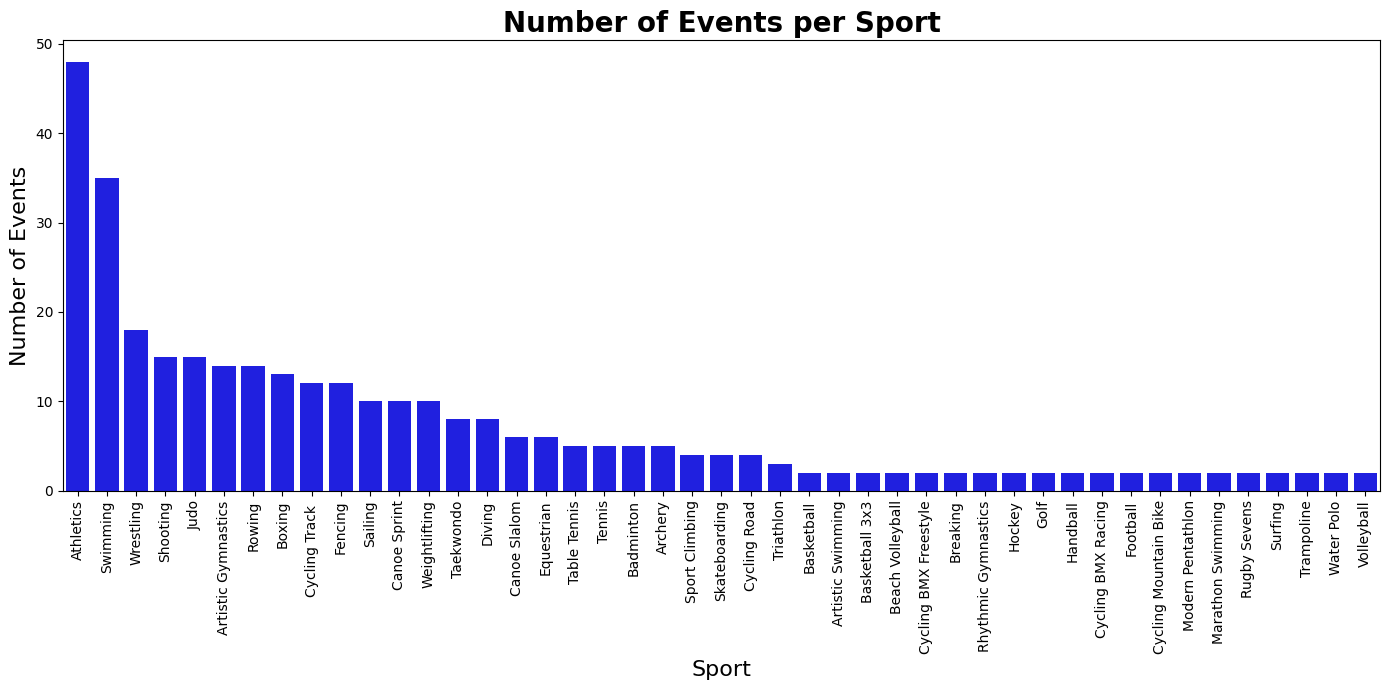

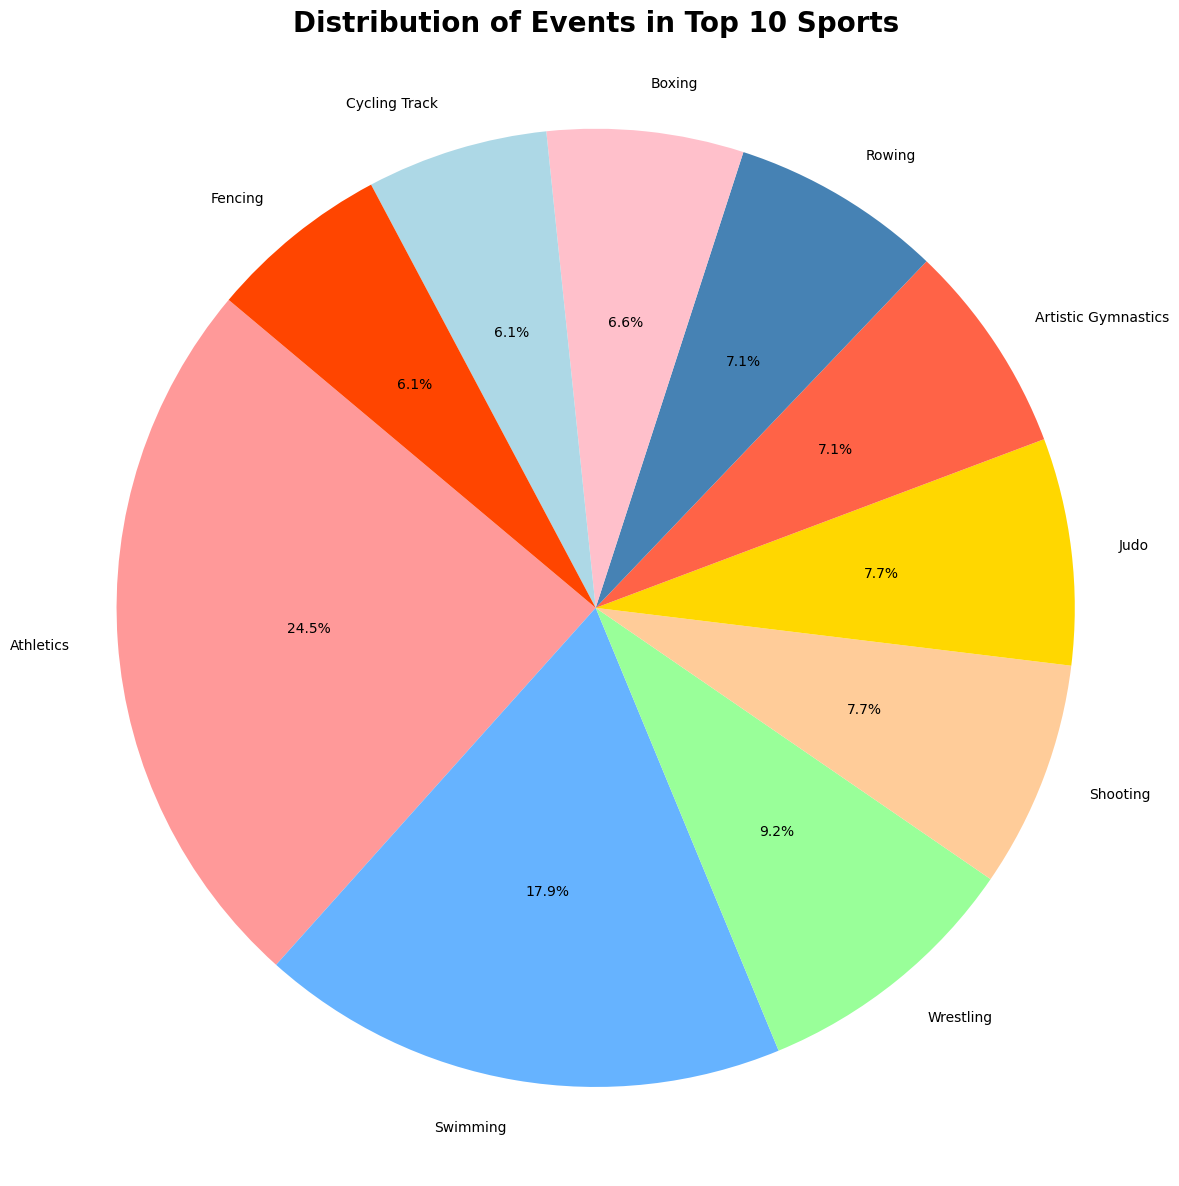

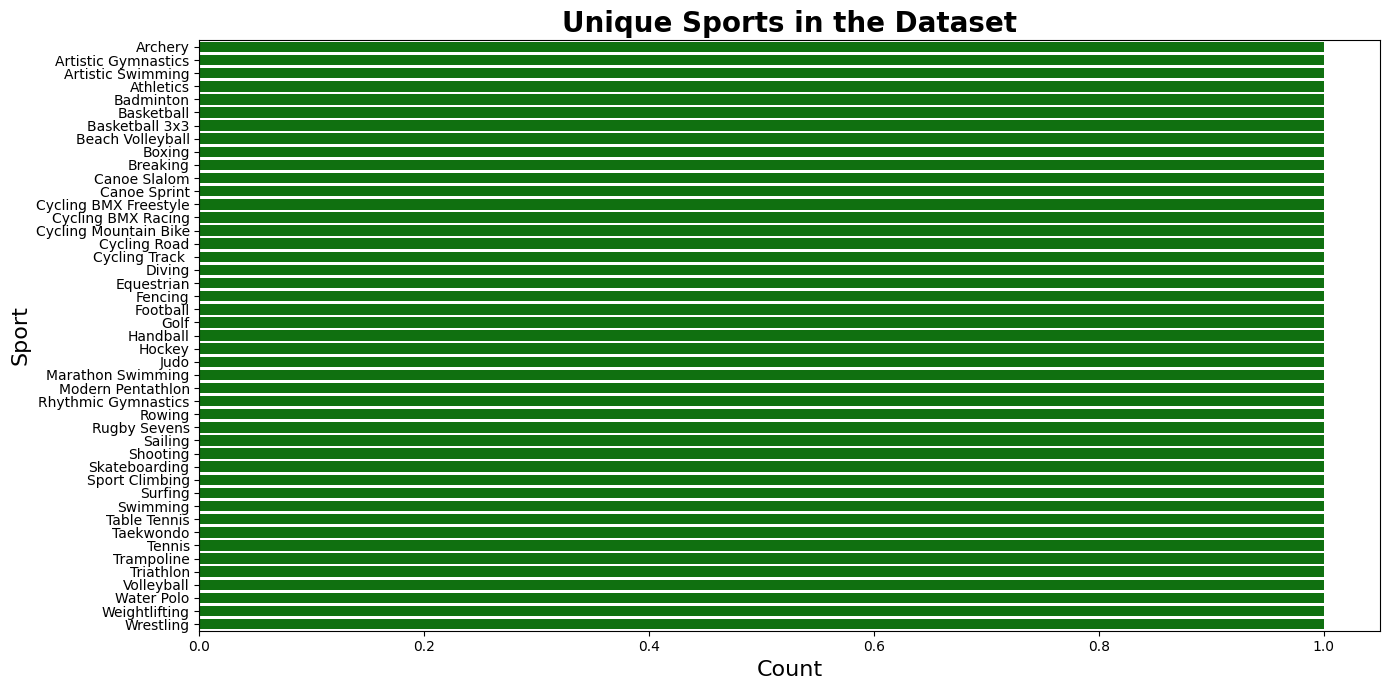


Unique Sports in the Dataset:
['Archery' 'Artistic Gymnastics' 'Artistic Swimming' 'Athletics'
 'Badminton' 'Basketball' 'Basketball 3x3' 'Beach Volleyball' 'Boxing'
 'Breaking' 'Canoe Slalom' 'Canoe Sprint' 'Cycling BMX Freestyle'
 'Cycling BMX Racing' 'Cycling Mountain Bike' 'Cycling Road'
 'Cycling Track ' 'Diving' 'Equestrian' 'Fencing' 'Football' 'Golf'
 'Handball' 'Hockey' 'Judo' 'Marathon Swimming' 'Modern Pentathlon'
 'Rhythmic Gymnastics' 'Rowing' 'Rugby Sevens' 'Sailing' 'Shooting'
 'Skateboarding' 'Sport Climbing' 'Surfing' 'Swimming' 'Table Tennis'
 'Taekwondo' 'Tennis' 'Trampoline' 'Triathlon' 'Volleyball' 'Water Polo'
 'Weightlifting' 'Wrestling']


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


events_df = pd.read_csv('paris_olympics2024/paris olympics 2024 dataset updated/events.csv')


events_per_sport = events_df['sport'].value_counts()


plt.figure(figsize=(14, 7))


sns.barplot(x=events_per_sport.index, y=events_per_sport.values, color='blue')


plt.title("Number of Events per Sport", fontsize=20, fontweight='bold')
plt.xlabel("Sport", fontsize=16)
plt.ylabel("Number of Events", fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

unique_sports_count = events_df['sport'].nunique()
sport_labels = events_per_sport.index[:10] 
sport_sizes = events_per_sport.values[:10]  


plt.figure(figsize=(12, 12))


plt.pie(sport_sizes, labels=sport_labels, autopct='%1.1f%%', startangle=140, 
        colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', 
                '#FF6347', '#4682B4', '#FFC0CB', '#ADD8E6', '#FF4500'])


plt.title(f"Distribution of Events in Top {len(sport_labels)} Sports", fontsize=20, fontweight='bold')
plt.axis('equal') 
plt.tight_layout()
plt.show()


unique_sports = events_df['sport'].unique()


plt.figure(figsize=(14, 7))


sns.countplot(y=unique_sports, color='green')


plt.title("Unique Sports in the Dataset", fontsize=20, fontweight='bold')
plt.xlabel("Count", fontsize=16)
plt.ylabel("Sport", fontsize=16)
plt.tight_layout()
plt.show()


print("\nUnique Sports in the Dataset:")
print(unique_sports)
